import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds_path = r"standardleaves"

In [3]:
test_img_path = ds_path + "\\15.jpg"
test_img_path

'standardleaves\\15.jpg'

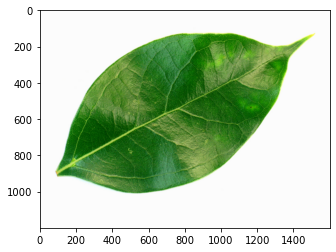

In [4]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
# Grayscaling

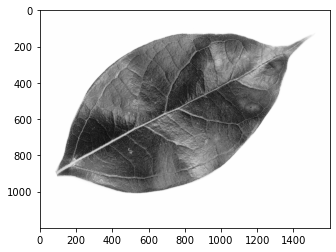

In [6]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [7]:
gs.shape

(1200, 1600)

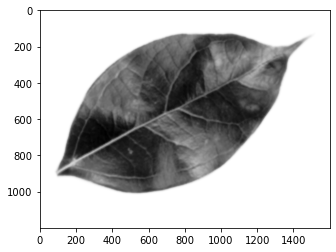

In [8]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')
# Smoothing image

In [9]:
# Adaptive image thresholding using Otsu's thresholding method

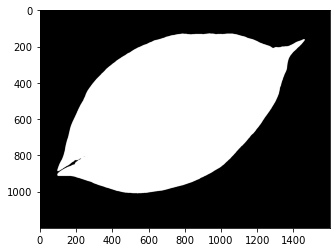

In [10]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')


In [11]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

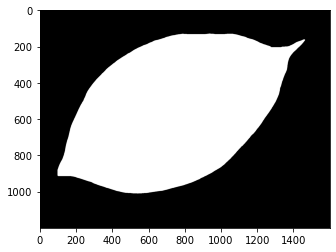

In [12]:
plt.imshow(closing,cmap='Greys_r')

In [13]:
# Boundary extraction for shape features
#  using sobel filters

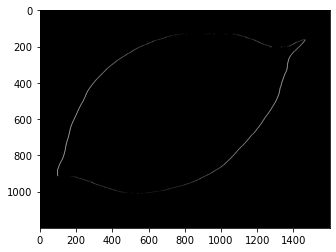

In [14]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

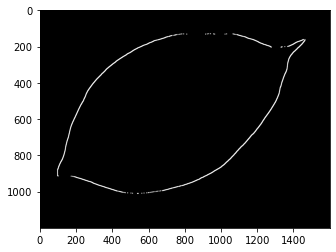

In [15]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

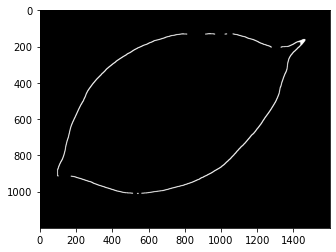

In [16]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

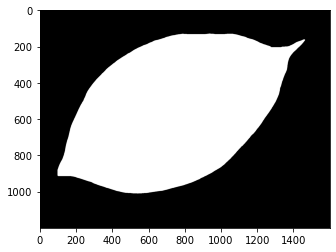

In [17]:
plt.imshow(closing,cmap="Greys_r")

In [18]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
len(contours)

1

In [20]:

cnt = contours[0]
len(cnt)

1645

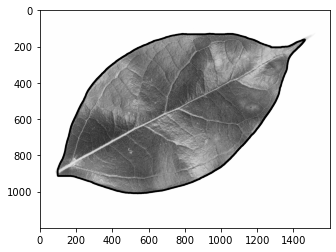

In [21]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [22]:
# Morphological processing Shape based features Calculating moments using contours

In [23]:
M = cv2.moments(cnt)
M

{'m00': 784413.0,
 'm10': 577736321.0,
 'm01': 437087706.6666666,
 'm20': 498631622307.1666,
 'm11': 299369149874.9166,
 'm02': 283926913354.5,
 'm30': 476029050389405.0,
 'm21': 243924731851648.53,
 'm12': 183952054983759.25,
 'm03': 203517769682888.8,
 'mu20': 73116929661.05414,
 'mu11': -22554943178.01233,
 'mu02': 40374520266.76941,
 'mu30': 1072349140967.8125,
 'mu21': -696574120666.0469,
 'mu12': -29997301154.21875,
 'mu03': 314385290480.78125,
 'nu20': 0.11883062490374391,
 'nu11': -0.036656599298360085,
 'nu02': 0.06561721745879875,
 'nu30': 0.001967769622175096,
 'nu21': -0.0012782193241679665,
 'nu12': -5.5045297938352496e-05,
 'nu03': 0.0005768996315028928}

In [24]:
area = cv2.contourArea(cnt)
area

784413.0

In [25]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3826.6786122322083

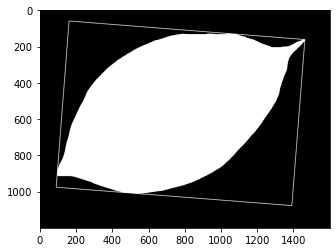

In [26]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

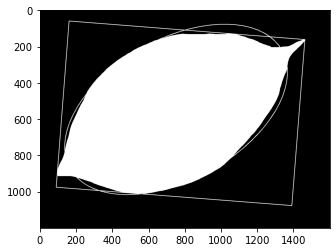

In [27]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [28]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.5511363636363635

In [29]:

rectangularity = w*h/area
rectangularity

1.53133617112414

In [30]:
circularity = ((perimeter)**2)/area
circularity

18.668060321941912

In [31]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter


999.3726287048006

In [32]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

In [33]:
# colour based features - RGB


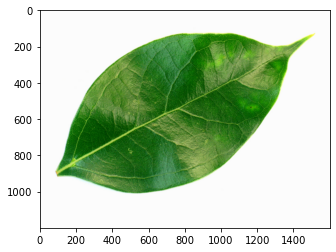

In [34]:

plt.imshow(img,cmap="Greys_r")

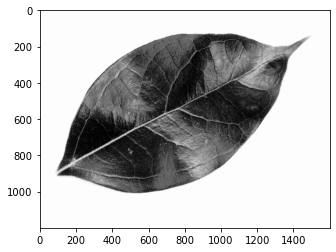

In [35]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

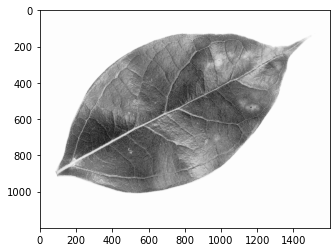

In [36]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

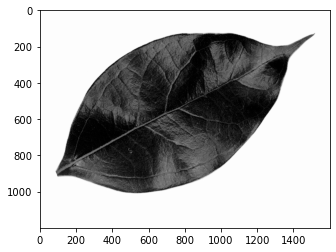

In [37]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [38]:

np.mean(blue_channel)

164.21764166666668

In [39]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [40]:
red_mean = np.mean(red_channel)
red_mean

174.041740625

In [41]:

green_mean = np.mean(green_channel)
green_mean

200.49315208333334

In [42]:
blue_mean = np.mean(blue_channel)
blue_mean

164.19280572916668

In [43]:
red_var = np.std(red_channel)
red_var


96.4265356394626

In [44]:
# Texture based features
# Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [45]:
import mahotas as mt

In [46]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean


array([ 3.29005381e-01,  1.77755216e+02,  9.86978426e-01,  6.82524233e+03,
        6.39975190e-01,  3.69452255e+02,  2.71232141e+04,  4.34577093e+00,
        6.24141425e+00,  1.47069987e-03,  2.82347751e+00, -4.15243405e-01,
        9.80671981e-01])

In [48]:
print('Contrast = ',ht_mean[1]) #contrast
print('Correlation = ',ht_mean[2]) #correlation
print('Inverse difference moments = ',ht_mean[4]) #inverse difference moments
print('Entropy = ',ht_mean[8]) #entropy

Contrast =  177.75521580673905
Correlation =  0.9869784255595053
Inverse difference moments =  0.6399751900011693
Entropy =  6.241414248767359
